# Classify A Doctor's Consultation Fee

In [1]:
#https://www.machinehack.com/course/predict-a-doctors-consultation-fees-hackathon/

# Data processing

In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

from nltk.corpus import stopwords

%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [3]:
#read csv to df
df = pd.read_csv('.\dataset\Final_Train.csv')

In [4]:
#5961 rows and 7 columns
df.shape

(5961, 7)

In [5]:
# get a feel of the df
#'Rating' are already extracted from Miscellaneous_Info
#'Fees' are our target variable
# Experience seems to be a very good predictor , plus we have no null values

df.sample(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
608,MBBS,17 years experience,NaN,"Sainikpuri, Hyderabad",General Medicine,Type 2 Diabetes Treatment Diabetic Diet Counse...,350
4302,"MS - ENT, MBBS",3 years experience,NaN,"Yelahanka, Bangalore",ENT Specialist,NaN,400
5896,"MBBS, MD - Skin,VD & Leprosy, Fellowship in De...",8 years experience,98%,"Juhu, Mumbai",Dermatologists,"98% 48 Feedback Juhu, Mumbai",100
3601,"MBBS, MS - ENT, DNB - Otorhinolaryngology, Cli...",8 years experience,100%,"Rohini Sector 15, Delhi",ENT Specialist,"100% 19 Feedback Rohini Sector 15, Delhi",300
2808,"MBBS, Diploma in Otorhinolaryngology (DLO), MD...",17 years experience,95%,"Velachery, Chennai",ENT Specialist,"95% 45 Feedback Velachery, Chennai",250
1526,BDS,11 years experience,NaN,"Mylapore, Chennai",Dentist,Dental Fillings Zirconia Crowns Scaling / Poli...,100
3589,BHMS,10 years experience,98%,"Sarjapur Road, Bangalore",Homeopath,"98% 144 Feedback Sarjapur Road, Bangalore",200
4778,"MD - Dermatology , Venereology & Leprosy, Fell...",8 years experience,93%,"Nungambakkam, Chennai",Dermatologists,Skin Boosters and Fillers Permanent Acne Solut...,550
4820,"BAMS, MD - Ayurveda Medicine",20 years experience,100%,"Yelahanka, Bangalore",Ayurveda,"100% 4 Feedback Yelahanka, Bangalore",400
626,"BDS, MDS - Periodontics",5 years experience,NaN,"Thoraipakkam, Chennai",Dentist,Scaling / Polishing Pulpectomy Oral Surgery Pr...,200


In [6]:
#'Fees' and 'Experience' should be numerical
# the rest should be categorical ( dummified later )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
#check % data that is null
#Rating and Miscellaneous_Info has close to half values that are null
total=pd.DataFrame({'is_null':df.isnull().sum().sort_values(ascending=False)}) #determine columns with missing values
total['Percentage']= (total.is_null/len(df)).round(2)
total=total[total.is_null!=0]
total

,is_null,Percentage
Rating,3302,0.55
Miscellaneous_Info,2620,0.44
Place,25,0.00


# Qualification

In [8]:
df.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [9]:
#Erraneous data & del the rows
df[df.Qualification=='Get inspired by remarkable stories of people like you']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
91,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
502,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
599,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
605,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
724,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
1002,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
1083,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
1210,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
2078,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100
2178,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100


In [10]:
#del the erraneous rows
remove=df[df.Qualification=='Get inspired by remarkable stories of people like you'].index
df=df.drop(remove,axis=0)

# Experience

In [11]:
#extract years and convert to INT
df['Experience']=df['Experience'].str.extract(pat='(\d+)')
df['Experience']=df['Experience'].astype(np.int)
df.Experience[:10]

0    24
1    12
2     9
3    12
4    20
5     8
6    42
7    10
8    14
9    23
Name: Experience, dtype: int32

# Rating

In [12]:
df.Rating

0       100%
1        98%
2        NaN
3        NaN
4       100%
5        NaN
6        NaN
7        99%
8        NaN
9        NaN
10       NaN
11       NaN
12       98%
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       79%
19      100%
20      100%
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26      100%
27       95%
28       NaN
29       97%
        ... 
5931     99%
5932     NaN
5933     96%
5934     NaN
5935     99%
5936    100%
5937     96%
5938     NaN
5939     NaN
5940     80%
5941     NaN
5942     90%
5943     95%
5944     NaN
5945     NaN
5946     99%
5947     NaN
5948     NaN
5949     NaN
5950    100%
5951     NaN
5952     NaN
5953     92%
5954     NaN
5955     NaN
5956     98%
5957     NaN
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5937, dtype: object

In [13]:
# Seperate Ratings into bins
df["Rating"].fillna("-99%",inplace=True)
df["Rating"] = df["Rating"].str[:-1].astype("int")

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df["Rating"] = pd.cut(df["Rating"],bins=bins,labels=labels,include_lowest=True)

In [14]:
df["Rating"].value_counts().sort_index()

0     3278
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [15]:
#remove the '%'' suffix
#df['Rating']=df.Rating.str.replace('%','')

In [16]:
#df.Rating.unique()

In [17]:
#convert those that can to numeric ,errors='coerce' forces non-convertible elements to NaN.
#df['Rating'] = df.Rating.apply(pd.to_numeric, errors='coerce')

In [18]:
#apply median of each 'Profile', rather than apply a blanket median value
#df['Rating']=df.groupby('Profile')['Rating'].transform(lambda x : x.fillna(x.median()))

In [19]:
#mask=df.Rating.isnull()
#temp=df[~mask]
#temp['Rating']=temp.Rating.astype(np.int)

In [20]:
#temp.groupby('Profile')['Rating'].median()

In [21]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    1
Profile                  0
Miscellaneous_Info    2596
Fees                     0
dtype: int64

# Place

In [22]:
df[df.Place.isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
4823,"MBBS, DDVL",22,0,NaN,Dermatologists,NaN,150


In [23]:
df[df.Profile=='Dermatologists']['Place'].value_counts()[:10]

Banjara Hills, Hyderabad    18
Andheri West, Mumbai        17
Dwarka, Delhi               14
Bandra West, Mumbai         14
HSR Layout, Bangalore       13
Indiranagar, Bangalore      13
Kandivali West, Mumbai      11
Pitampura, Delhi            11
Jubilee Hills, Hyderabad    11
Dilsukhnagar, Hyderabad     10
Name: Place, dtype: int64

In [24]:
df.Place.fillna('Banjara Hills, Hyderabad',inplace=True)

In [25]:
df[df.Profile=='Dentist']['Place'].value_counts()[:10]

R.S. Puram, Coimbatore      26
Kondapur, Hyderabad         23
Thoraipakkam, Chennai       20
HSR Layout, Bangalore       20
Banjara Hills, Hyderabad    19
Marathahalli, Bangalore     17
Jubilee Hills, Hyderabad    16
Bandra West, Mumbai         15
Adyar, Chennai              14
Koramangala, Bangalore      14
Name: Place, dtype: int64

In [26]:
df.loc[[3980]]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
3980,BDS,23,0,e,Dentist,NaN,250


In [27]:
#fill in the this value as it has the highest median
df.loc[3980,'Place']='R.S. Puram, Coimbatore'

# Place - Feature Engineering

In [28]:
#split 'Place' by comma
temp=df['Place'].str.split(',',n=1,expand=True)

In [29]:
#remove leading space
temp[1] = temp[1].str.lstrip()

In [30]:
#there are 865 neighbourhoods
len(temp[0].unique())

865

In [31]:
#there are 9 cities
len(temp[1].unique())

9

In [32]:
#assign locality and city
df['locality']=temp[0]
df['city']=temp[1]

In [33]:
df.city.value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              952
Chennai                855
Coimbatore             229
Ernakulam              153
Thiruvananthapuram      86
Sector 5, Delhi          1
Name: city, dtype: int64

In [34]:
#change Sector 5, Delhi to Delhi
df.loc[df.city=='Sector 5, Delhi','city']='Delhi'

# Profile & Fees

In [35]:
df.Profile.isnull().sum()

0

In [36]:
df.Fees.isnull().sum()

0

# Miscellaneous_Info

In [37]:
df.Miscellaneous_Info.sample(10)

2307                                                  NaN
1520                                                  NaN
2349                     100% 8 Feedback Kilpauk, Chennai
2491                                                  NaN
2650                                                  NaN
3487    Tooth Extraction Ceramic Veneers / Crowns Fixe...
2066              Guduvanchery, Chennai ₹100 Visits Today
3362             96% 28 Feedback Hazrat Nizamuddin, Delhi
5005                                                  NaN
1756                                                  NaN
Name: Miscellaneous_Info, dtype: object

In [38]:
#not useful as the Rating has already been extracted to another column
df.drop(columns='Miscellaneous_Info',inplace=True)

# Qualification

In [39]:
df.Qualification

0                                   BHMS, MD - Homeopathy
1                            BAMS, MD - Ayurveda Medicine
2                          MBBS, MS - Otorhinolaryngology
3                                     BSc - Zoology, BAMS
4                                                    BAMS
5                                                    BAMS
6                                                    BHMS
7                                                     BDS
8                             MBBS, MD - General Medicine
9                                                BSc, BDS
10                                    MBBS, MS, DNB - ENT
11                                                   BAMS
12                                               BDS, MDS
13                BDS, MDS - Oral & Maxillofacial Surgery
14      MBBS, Diploma in Otorhinolaryngology (DLO), DN...
15                            MBBS, MD - General Medicine
16             MBBS, Diploma in Otorhinolaryngology (DLO)
17            

In [40]:
stopWords = set(stopwords.words('english'))

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [41]:
#retain words that is between 2 to 4 chars and remove redundancy
def two_four_chars(text):
    clean=[]
    for word in text.split():
        if len(word) in (2,3,4):
            clean.append(word)
        else: pass
    return list(dict.fromkeys(clean)) #remove redundancy

In [42]:
df['Qualification'] = df['Qualification'].apply(two_four_chars)

In [43]:
#join the words for countvectorising
df['Qualification'] = df['Qualification'].apply(lambda x : ' '.join(x))

In [44]:
df.reset_index(drop=True,inplace=True)

In [45]:
#min_df is used to limit total columns of 40 vs more than 240 if the whole corpus is included
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=50)
count_vect=cv.fit_transform(df['Qualification']).A

In [46]:
print(f'There are {len(cv.get_feature_names())} unique words in this corpus')

There are 17 unique words in this corpus


In [47]:
nlp=pd.DataFrame(cv.fit_transform(df['Qualification']).A,columns=cv.get_feature_names())
#top 40 columns in Qualifications column
nlp.sum(axis=0).sort_values(ascending=False)

md      1542
bds     1363
in      1070
mds      752
mbbs     632
ms       626
bams     515
bhms     513
ent      512
dnb      408
and      374
oral     252
post     143
of       134
ddv      129
ddvl     109
phd       51
dtype: int64

In [48]:
#columns to drop
#Qualification ( as we already countvectorized it )
#Place ( as we already split to city and locality)
#Locality ( as city is granular enough)
drop_col = ['Qualification','Place','locality']

In [49]:
df.drop(drop_col,axis=1,inplace=True)

In [50]:
#save to new dataframe & csv
df=pd.concat([df, nlp], axis=1)
df.to_csv('.\dataset\Clean_Final_Train.csv',index=False)

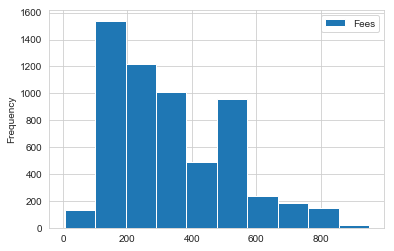

In [51]:
df.Fees.to_frame().plot(kind='hist');

# Continue to part 2